# OpenABM-Covid19 - Example Lockdown then Shield

This examples show how to run a simulation on 50k people and turn on a lockdown after 20 days.

First we get the model with baseline parameters but change the population to 50k.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from COVID19.model import Model as abm

model = abm( params = { "n_total" : 50000 })

Now we run for 30 days.

In [2]:
for t in range(30):
    model.one_time_step()

Now we turn on a lockdown where the number of interactions on the occupation networks and random network are cut to 10% of their pre-lockdown level and the strength of household transmissions is 1.5 times the pre-lockdown level. And run for another 10 days.

In [3]:
model.update_running_params("lockdown_occupation_multiplier_primary_network", 0.1)
model.update_running_params("lockdown_occupation_multiplier_secondary_network", 0.1)
model.update_running_params("lockdown_occupation_multiplier_working_network", 0.1)
model.update_running_params("lockdown_occupation_multiplier_retired_network", 0.1)
model.update_running_params("lockdown_occupation_multiplier_elderly_network", 0.1)
model.update_running_params("lockdown_random_network_multiplier", 0.1)
model.update_running_params("lockdown_house_interaction_multiplier", 1.5)
model.update_running_params("lockdown_on", 1)
for t in range(10):
    model.one_time_step()

Children and adults occupational network interactions return to 80% of their prior interactions level, random interactions go to 40% of their prior levels and the elderly remain shielded.

In [4]:
model.update_running_params("lockdown_occupation_multiplier_primary_network", 0.8)
model.update_running_params("lockdown_occupation_multiplier_secondary_network", 0.8)
model.update_running_params("lockdown_occupation_multiplier_working_network", 0.8)
model.update_running_params("lockdown_random_network_multiplier", 0.4)
model.update_running_params("lockdown_house_interaction_multiplier", 1)
for t in range(10):
    model.one_time_step()

Plot the number of daily new infections over the course of the simulation for the 50y-59y age group and the 70y-79y age group. Note infections rise very slowly in the 70y-79y age group who are being shielded.

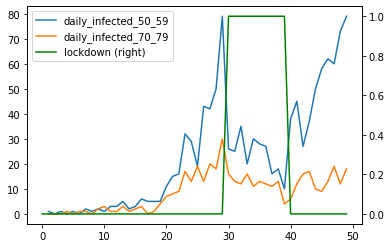

In [5]:
timeseries = model.results 
timeseries["daily_infected_50_59"] = timeseries["total_infected_50_59"].diff(1)
timeseries["daily_infected_70_79"] = timeseries["total_infected_70_79"].diff(1)
timeseries['lockdown'] = timeseries.apply(lambda X: 1 if ( X.time >30) & ( X.time <= 40 ) else 0, axis=1)

plt.figure()
timeseries.daily_infected_50_59.plot( x = "time", legend = True )
timeseries.daily_infected_70_79.plot( x = "time", legend = True )
timeseries.lockdown.plot( x = "time", legend = True, secondary_y = True, style = 'g' )
